In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
sns.set()

In [2]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

dataset = pd.read_csv("./entrenamieto.csv", parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Actual_Delivery_Date' ])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [3]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [4]:
dataset[dataset['Stage']== 'Closed Won']['ASP_Currency'].value_counts()

USD    3592
JPY    3112
EUR    2422
AUD     407
Name: ASP_Currency, dtype: int64

In [5]:
dataset['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [6]:
print(dataset['ASP'].isna().sum())

dataset['conversion'] = dataset['ASP']/dataset['ASP_(converted)']
print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())

3209
1.000000      3389
0.884099       169
111.230206     143
0.884102       139
111.230898     136
              ... 
1.413212         1
0.884099         1
0.884093         1
111.713121       1
110.011001       1
Name: conversion, Length: 186, dtype: int64


In [7]:
#promedio y desvio std del converidor de japon
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].std())

111.19531347490873
2.826732408998794


In [8]:
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].std())

0.8841258693218559
0.0017312124067338172


In [9]:
dataset['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [10]:
dataset.loc[dataset.ASP_Currency == 'USD', 'conversion'] = 1

In [11]:
dataset['conversion'].value_counts()
dataset['count'] = 1

In [12]:
print(dataset['conversion'].isna().sum())

2984


In [13]:
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].notna().sum())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].isna().sum())

1559
2963


In [14]:
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset['conversion'].value_counts()

1.000000      7362
111.195313    2963
0.884102       271
0.884108       257
0.884091       230
              ... 
1.413216         1
111.412961       1
0.758694         1
0.884101         1
0.884091         1
Name: conversion, Length: 205, dtype: int64

In [15]:
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())

In [16]:
print(dataset['conversion'].isna().sum())

0


In [17]:
print(dataset.loc[dataset.ASP_Currency == 'USD', 'Total_Amount'].isna().sum())

47


In [18]:
dataset['Opportunity_Owner'].value_counts()

Person_Name_50    3781
Person_Name_8     1422
Person_Name_13    1254
Person_Name_18     982
Person_Name_43     838
Person_Name_3      832
Person_Name_4      687
Person_Name_32     686
Person_Name_19     615
Person_Name_64     516
Person_Name_16     446
Person_Name_23     422
Person_Name_46     329
Person_Name_65     322
Person_Name_49     286
Person_Name_48     256
Person_Name_38     254
Person_Name_66     243
Person_Name_44     240
Person_Name_39     211
Person_Name_60     207
Person_Name_62     174
Person_Name_52     173
Person_Name_54     171
Person_Name_5      169
Person_Name_59     134
Person_Name_45     128
Person_Name_2      118
Person_Name_41     113
Person_Name_51     111
Person_Name_55      91
Person_Name_33      87
Person_Name_14      82
Person_Name_11      77
Person_Name_30      69
Person_Name_63      67
Person_Name_40      50
Person_Name_25      49
Person_Name_20      49
Person_Name_22      43
Person_Name_26      33
Person_Name_12      23
Person_Name_37      21
Person_Name

In [19]:
#quaters mas eficientes
dataset.groupby([ 'Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).unstack()

count                                              
Stage            Closed Lost Closed Won Negotiation Proposal Qualification
Delivery_Quarter                                                          
Q1                    2101.0     2194.0         8.0     13.0           1.0
Q2                    1905.0     2518.0         9.0      8.0           3.0
Q3                    1813.0     2218.0         1.0     10.0           1.0
Q4                    1531.0     2603.0         NaN      4.0           6.0

In [20]:
dataset.groupby([ 'Delivery_Year','Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).reset_index()

,Delivery_Year,Delivery_Quarter,Stage,count
0,2016,Q1,Closed Lost,810
1,2016,Q1,Closed Won,454
2,2016,Q2,Closed Lost,596
3,2016,Q2,Closed Won,480
4,2016,Q3,Closed Lost,472
5,2016,Q3,Closed Won,527
6,2016,Q4,Closed Lost,356
7,2016,Q4,Closed Won,676
8,2017,Q1,Closed Lost,466
9,2017,Q1,Closed Won,857


In [21]:
dataset['Quote_Type'].value_counts()


Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

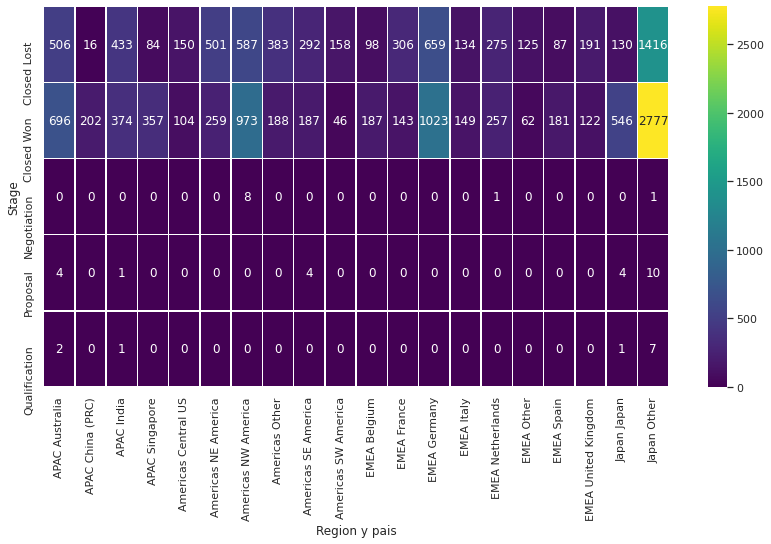

In [22]:
#pais/region con mas ventas
dataset.loc[dataset['Territory'] == 'None', 'Territory'] = 'Other'

dataset['Region y pais'] = dataset['Region'] + ' ' + dataset['Territory'] 
lista_top_paises = dataset['Region y pais'].value_counts().head(20).index.tolist()

top_paises = dataset[dataset['Region y pais'].isin(lista_top_paises)]

top_paises = top_paises.groupby(['Region y pais', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_paises = top_paises.pivot("Stage", "Region y pais", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_paises, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [23]:
top_paises[top_paises['Stage'] == 'Closed Won'].nlargest(10, 'count')

,Region y pais,Stage,count
48,Japan Other,Closed Won,2777
31,EMEA Germany,Closed Won,1023
17,Americas NW America,Closed Won,973
1,APAC Australia,Closed Won,696
44,Japan Japan,Closed Won,546
7,APAC India,Closed Won,374
11,APAC Singapore,Closed Won,357
15,Americas NE America,Closed Won,259
35,EMEA Netherlands,Closed Won,257
5,APAC China (PRC),Closed Won,202


In [24]:
#clientes con mas ventas por quarter
top_clientes_periodo = dataset.groupby(['Opportunity_Owner','Delivery_Quarter', 'Delivery_Year', 'Stage']).agg({'count' : 'count'}).reset_index()
top_clientes_periodo[top_clientes_periodo['Stage'] == 'Closed Won'].nlargest(10, 'count')

,Opportunity_Owner,Delivery_Quarter,Delivery_Year,Stage,count
572,Person_Name_50,Q4,2017,Closed Won,453
556,Person_Name_50,Q2,2017,Closed Won,271
558,Person_Name_50,Q2,2018,Closed Won,266
548,Person_Name_50,Q1,2017,Closed Won,260
565,Person_Name_50,Q3,2017,Closed Won,253
570,Person_Name_50,Q4,2016,Closed Won,238
546,Person_Name_50,Q1,2016,Closed Won,180
554,Person_Name_50,Q2,2016,Closed Won,177
563,Person_Name_50,Q3,2016,Closed Won,156
39,Person_Name_13,Q2,2017,Closed Won,138


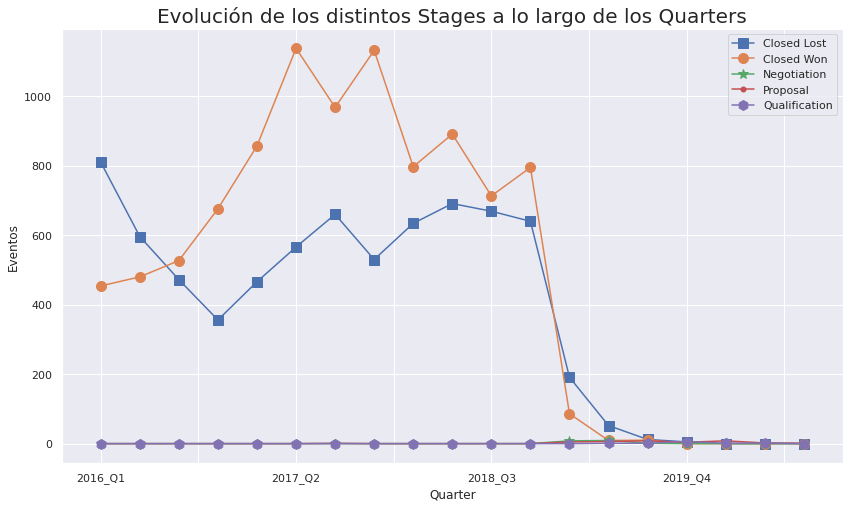

In [25]:
dataset['Delivery_Period'] =dataset['Delivery_Year'].astype(str) + '_' + dataset['Delivery_Quarter'] 
#dataset['Delivery_Period'].value_counts()
#dataset['Ocurrencias'] = 1
tabla=dataset[['Delivery_Period','count','Stage']].groupby(['Delivery_Period','Stage']).count()
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de los distintos Stages a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('Closed Lost')
L.get_texts()[1].set_text('Closed Won')
L.get_texts()[2].set_text('Negotiation')
L.get_texts()[3].set_text('Proposal')
L.get_texts()[4].set_text('Qualification')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

In [26]:
tabla.head

<bound method NDFrame.head of                       count                                              
Stage           Closed Lost Closed Won Negotiation Proposal Qualification
Delivery_Period                                                          
2016_Q1               810.0      454.0         0.0      0.0           0.0
2016_Q2               596.0      480.0         0.0      0.0           0.0
2016_Q3               472.0      527.0         0.0      0.0           0.0
2016_Q4               356.0      676.0         0.0      0.0           0.0
2017_Q1               466.0      857.0         0.0      0.0           0.0
2017_Q2               566.0     1138.0         0.0      0.0           0.0
2017_Q3               660.0      968.0         0.0      1.0           0.0
2017_Q4               530.0     1132.0         0.0      0.0           0.0
2018_Q1               634.0      797.0         0.0      0.0           0.0
2018_Q2               691.0      891.0         0.0      0.0           0.0
2018_Q3 

In [27]:
#clientes con mayor cantidad de ventas peridas
top_clientes_periodo[top_clientes_periodo['Stage'] == 'Closed Lost'].nlargest(10, 'count')

,Opportunity_Owner,Delivery_Quarter,Delivery_Year,Stage,count
545,Person_Name_50,Q1,2016,Closed Lost,621
553,Person_Name_50,Q2,2016,Closed Lost,292
562,Person_Name_50,Q3,2016,Closed Lost,187
406,Person_Name_43,Q2,2018,Closed Lost,109
838,Person_Name_8,Q3,2017,Closed Lost,105
400,Person_Name_43,Q1,2018,Closed Lost,92
216,Person_Name_3,Q1,2017,Closed Lost,86
412,Person_Name_43,Q3,2018,Closed Lost,79
232,Person_Name_3,Q3,2017,Closed Lost,74
832,Person_Name_8,Q2,2018,Closed Lost,68


In [28]:
#clientes nuevos vs clientes viejos
dataset['Tiempo_Desde_Creacion_De_Cuenta'] = dataset['Opportunity_Created_Date'] - dataset['Account_Created_Date']


dataset['Tiempo_Desde_Creacion_De_Cuenta'].value_counts()

tiempo_negativo = dataset[dataset['Tiempo_Desde_Creacion_De_Cuenta'].dt.days< 0]
tiempo_negativo['Stage'].value_counts()


Closed Won     63
Closed Lost    47
Name: Stage, dtype: int64

In [29]:
tiempo_desde_creacion = dataset.groupby(['Tiempo_Desde_Creacion_De_Cuenta', 'Stage']).agg({'count' : 'count'}).reset_index()

In [30]:
tiempo_desde_creacion.head()

,Tiempo_Desde_Creacion_De_Cuenta,Stage,count
0,-490 days,Closed Won,4
1,-472 days,Closed Won,1
2,-329 days,Closed Lost,1
3,-304 days,Closed Lost,1
4,-278 days,Closed Lost,1


In [31]:
dataset['tiempo_hasta_entrega'] = dataset['Planned_Delivery_End_Date'] - dataset['Opportunity_Created_Date']
dataset['tiempo_esperado_entrega'] = dataset['Planned_Delivery_End_Date'] - dataset['Planned_Delivery_Start_Date']
dataset['tiempo_esperado_entrega'] = dataset['tiempo_esperado_entrega']/np.timedelta64(1, 'D')
dataset_tiempo = dataset.loc[dataset['tiempo_esperado_entrega'].notna()]
dataset_tiempo.loc[ : ,'tiempo_esperado_entrega']= dataset_tiempo.loc[:, 'tiempo_esperado_entrega'].astype(int)
dataset_tiempo.shape
#f, ax = mplt.subplots(figsize=(14, 7))
#sns.violinplot(x="Stage", y="tiempo_esperado_entrega", data=dataset_tiempo)

/home/lucas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(16872, 59)

Text(0.5, 1.0, 'Diferencia entre fechas fecha maxima y minima de llegada de los distintos stages')

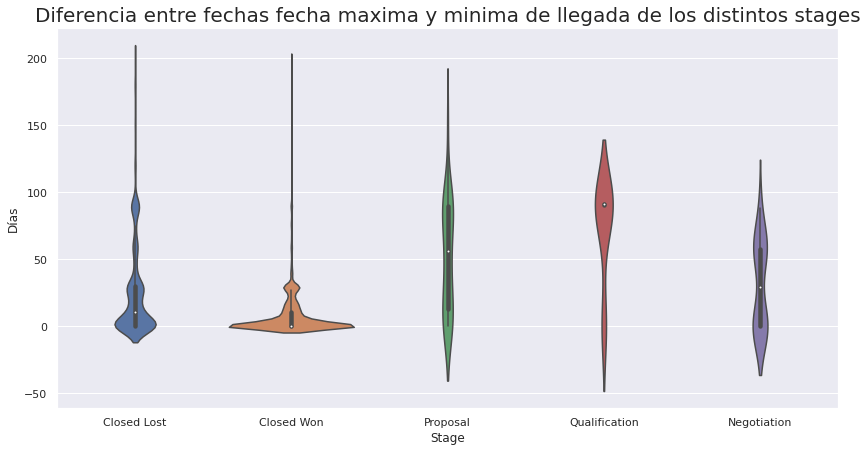

In [32]:
#filtramos algunos datos previos para visualizar
dataset_tiempo = dataset_tiempo.loc[dataset_tiempo['tiempo_esperado_entrega'] < 200]
dataset_tiempo.shape
f, ax = mplt.subplots(figsize=(14, 7))
violin_plot = sns.violinplot(x="Stage", y="tiempo_esperado_entrega", data=dataset_tiempo)
violin_plot.set_ylabel("Días",fontsize=12)
violin_plot.set_title("Diferencia entre fechas fecha maxima y minima de llegada de los distintos stages",fontsize=20)

In [33]:
tiempo_hasta_adquicicion = dataset.groupby(['tiempo_hasta_entrega', 'Stage']).agg({'count' : 'count'}).reset_index()

In [34]:
tiempo_hasta_adquicicion


,tiempo_hasta_entrega,Stage,count
0,-267 days,Closed Won,1
1,-256 days,Closed Won,2
2,-227 days,Closed Won,2
3,-196 days,Closed Won,2
4,-184 days,Closed Won,1
...,...,...,...
1065,1186 days,Closed Won,1
1066,1304 days,Closed Lost,1
1067,1507 days,Closed Lost,1
1068,1812 days,Closed Lost,1


In [35]:
#marcas
dataset['Brand'].value_counts()

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_7        17
Brand_13       17
Brand_21       17
Brand_20       10
Brand_23       10
Brand_27        5
Brand_17        5
Brand_0         4
Brand_2         4
Brand_4         4
Brand_12        3
Brand_16        2
Brand_26        1
Brand_19        1
Brand_6         1
Brand_3         1
Brand_1         1
Name: Brand, dtype: int64

In [36]:

lista_top_product = dataset['Product_Name'].value_counts().head(20).index.tolist()
lista_top_product

['Product_Name_100',
 'Product_Name_226',
 'Product_Name_231',
 'Product_Name_491',
 'Product_Name_4',
 'Product_Name_192',
 'Product_Name_111',
 'Product_Name_132',
 'Product_Name_495',
 'Product_Name_29',
 'Product_Name_148',
 'Product_Name_452',
 'Product_Name_167',
 'Product_Name_241',
 'Product_Name_220',
 'Product_Name_209',
 'Product_Name_20',
 'Product_Name_181',
 'Product_Name_439',
 'Product_Name_214']

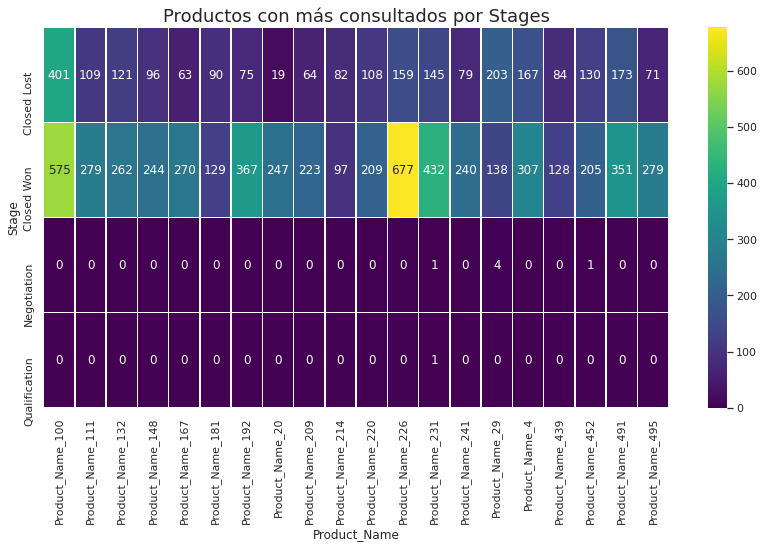

In [37]:
top_products = dataset[dataset['Product_Name'].isin(lista_top_product)]

#product_Dataset = product_Dataset[ (product_Dataset['Product_Type'] !='None')]
top_products = top_products.groupby(['Product_Name', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_products = top_products.pivot("Stage", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
title="Productos con más consultados por Stages"
mplt.title(title,fontsize=18)
sns.heatmap(pivoted_top_products, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
#product_Dataset.nlargest(10, 'count')

Text(0.5, 1.0, 'Cantidad de oportunidades por Quarters y Stages')

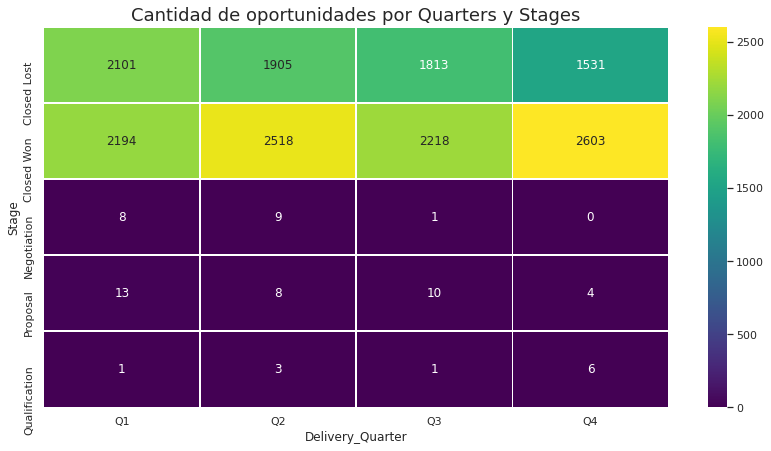

In [38]:
top_quarters = dataset.groupby(['Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters.pivot("Stage", "Delivery_Quarter", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades por Quarters y Stages"
mplt.title(title,fontsize=18)
#product_Dataset.nlargest(10, 'count')

In [39]:
dataset_wins = dataset[dataset['Stage'] == 'Closed Won']
dataset_lost = dataset[dataset['Stage'] == 'Closed Lost']

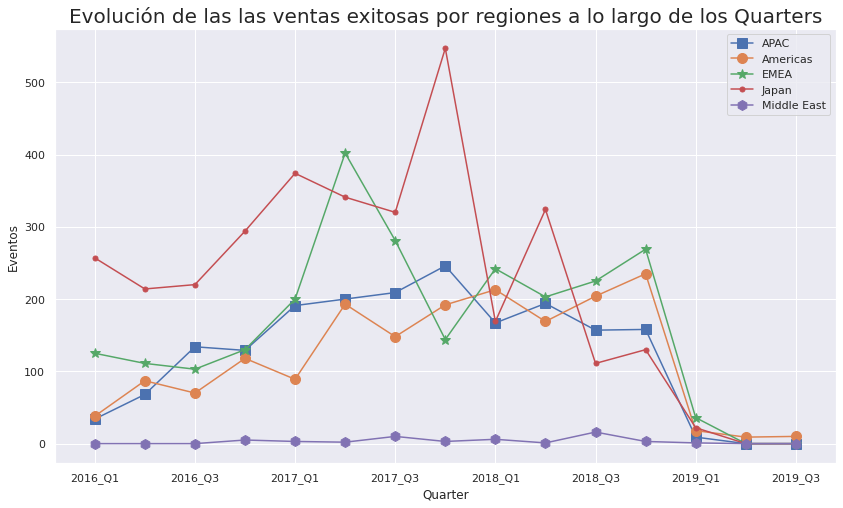

In [40]:
tabla=dataset_wins[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de las las ventas exitosas por regiones a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('APAC')
L.get_texts()[1].set_text('Americas')
L.get_texts()[2].set_text('EMEA')
L.get_texts()[3].set_text('Japan')
L.get_texts()[4].set_text('Middle East')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

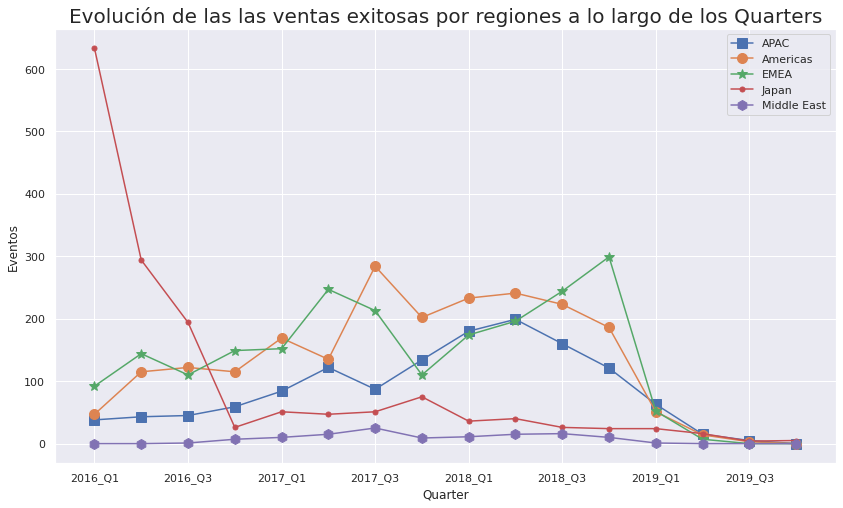

In [41]:
tabla=dataset_lost[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de las las ventas exitosas por regiones a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('APAC')
L.get_texts()[1].set_text('Americas')
L.get_texts()[2].set_text('EMEA')
L.get_texts()[3].set_text('Japan')
L.get_texts()[4].set_text('Middle East')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

In [42]:
tabla=dataset_lost[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

In [43]:
tabla = dataset_wins[['Delivery_Period','count','Region']].pivot_table(values = 'count',columns= 'Region', index= 'Delivery_Period', aggfunc=np.sum).reset_index()
tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
tabla = tabla.fillna(0)
tabla

,Delivery_Period,APAC,Americas,EMEA,Japan,Middle East
0,2016_Q1,34.0,38.0,125.0,257.0,0.0
1,2016_Q2,68.0,87.0,111.0,214.0,0.0
2,2016_Q3,134.0,70.0,103.0,220.0,0.0
3,2016_Q4,129.0,118.0,130.0,294.0,5.0
4,2017_Q1,191.0,89.0,200.0,374.0,3.0
5,2017_Q2,200.0,193.0,402.0,341.0,2.0
6,2017_Q3,209.0,148.0,281.0,320.0,10.0
7,2017_Q4,246.0,192.0,144.0,547.0,3.0
8,2018_Q1,167.0,213.0,242.0,169.0,6.0
9,2018_Q2,194.0,169.0,203.0,324.0,1.0


In [68]:
tabla=dataset[['Delivery_Period','count','Stage']].pivot_table(values = 'count',columns= 'Stage', index= 'Delivery_Period', aggfunc=np.sum).reset_index(level = 0)
tabla = tabla.fillna(0)
tabla.columns = ['Delivery_Period', 'Closed Lost', 'Closed Won', 'Negotiation','Proposal', 'Qualification']
#tabla.set_index('Delivery_Period')
data_perc = tabla.loc[:,['Closed Lost', 'Closed Won', 'Negotiation','Proposal', 'Qualification']].divide(tabla.drop(columns = ['Delivery_Period']).sum(axis=1), axis=0)
data_perc

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,0.640823,0.359177,0.000000,0.000000,0.000000
1,0.553903,0.446097,0.000000,0.000000,0.000000
2,0.472472,0.527528,0.000000,0.000000,0.000000
3,0.344961,0.655039,0.000000,0.000000,0.000000
4,0.352230,0.647770,0.000000,0.000000,0.000000
5,0.332160,0.667840,0.000000,0.000000,0.000000
6,0.405157,0.594230,0.000000,0.000614,0.000000
7,0.318893,0.681107,0.000000,0.000000,0.000000
8,0.443047,0.556953,0.000000,0.000000,0.000000
9,0.436789,0.563211,0.000000,0.000000,0.000000


(-1.5500000000000005, 16.550000000000008)

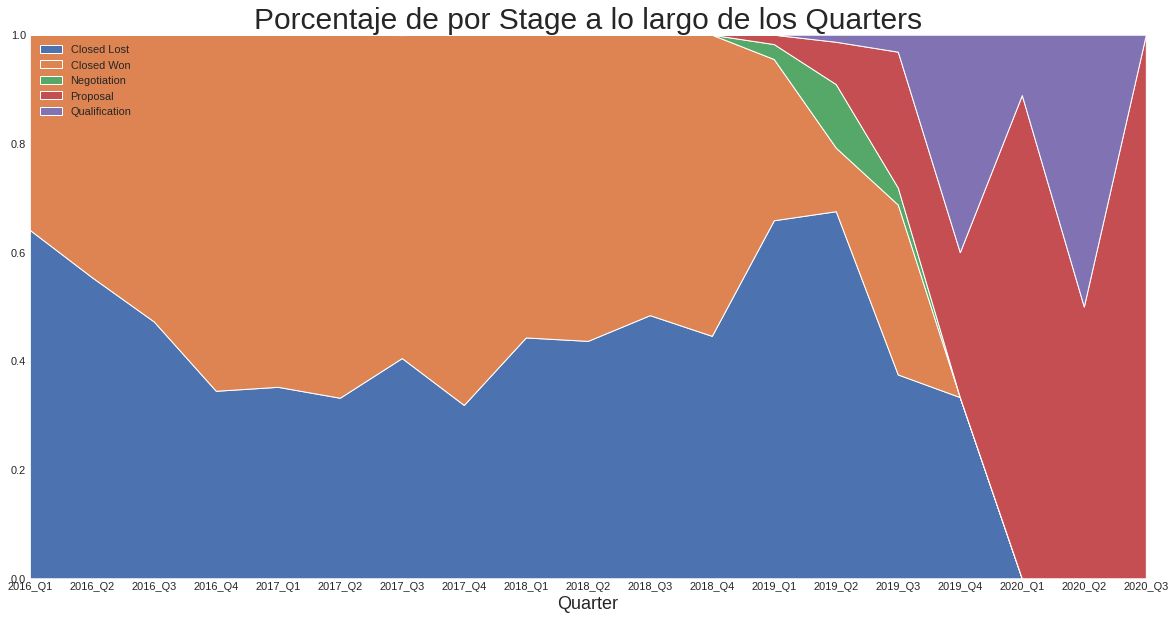

In [72]:
mplt.figure(figsize=(20,10))
mplt.style.use('seaborn-darkgrid')
mplt.stackplot(tabla['Delivery_Period'],  data_perc["Closed Lost"],  data_perc["Closed Won"],  data_perc["Negotiation"],data_perc["Proposal"],data_perc["Qualification"], labels=['Closed Lost', 'Closed Won','Negotiation','Proposal', 'Qualification'])
mplt.legend(loc='upper left')
mplt.margins(0,0)
mplt.title('Porcentaje de por Stage a lo largo de los Quarters',fontsize=30)


linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')

#fig.suptitle('test title', fontsize=20)
mplt.xlabel('Quarter', fontsize=18)
mplt.rc('axes', labelsize=20)
#mplt.axes(['2016_Q1',2017_Q1',1,1])
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
#set(gca,'FontSize',16)


In [46]:
lista_top_Account_Owner_win = dataset_wins['Account_Owner'].value_counts().head(20).index.tolist()

top_Account_Owner = dataset_wins[dataset_wins['Account_Owner'].isin(lista_top_Account_Owner_win)]
top_Account_Owner

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,83865.60,Closed Won,Prod_Category_A_None,1.000000,1,Americas NW America,2016_Q1,231 days,48 days,0.0
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,...,50688.00,Closed Won,Prod_Category_A_None,1.000000,1,Americas NW America,2016_Q1,232 days,47 days,0.0
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,103350.00,Closed Won,Prod_Category_A_None,0.884100,1,EMEA Germany,2016_Q1,865 days,51 days,11.0
64,19342,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2013-08-22,...,3184974.00,Closed Won,Prod_Category_A_None,1.000000,1,Americas NW America,2016_Q1,840 days,112 days,30.0
65,24444,Japan,Other,1,1,0,0,0,Bureaucratic_Code_4,2015-04-20,...,243360.00,Closed Won,Prod_Category_A_None,111.229947,1,Japan Other,2016_Q1,234 days,29 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,528918.75,Closed Won,Prod_Category_A_None,0.884100,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,2013-07-27,...,401700.00,Closed Won,Prod_Category_A_None,0.884105,1,EMEA Norway,2016_Q2,860 days,139 days,20.0
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


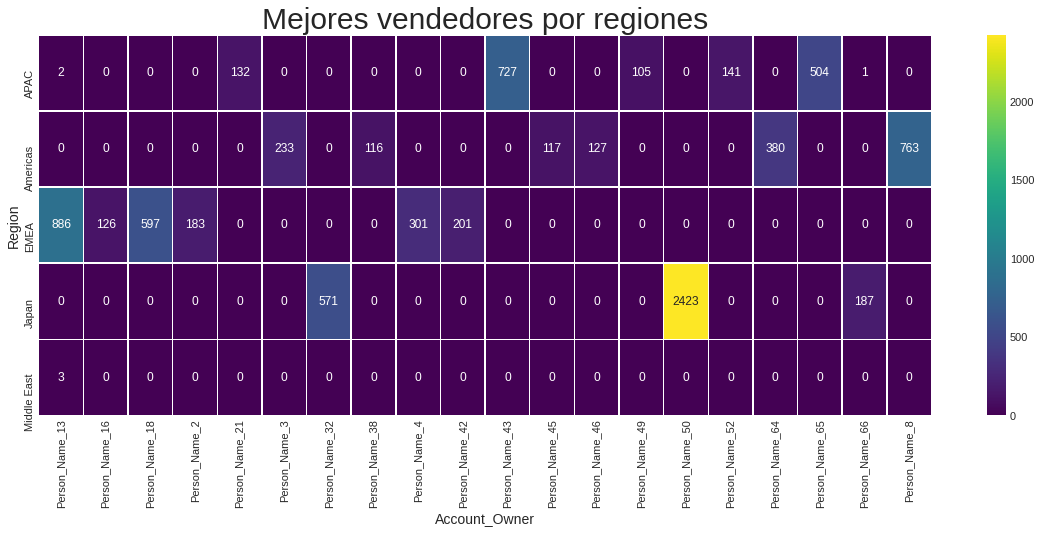

In [47]:
tabla = top_Account_Owner[['Region','Account_Owner','count']].groupby(['Region','Account_Owner']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Account_Owner", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Mejores vendedores por regiones',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
#tabla_pivot

In [48]:
dataset['Opportunity_Type'].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     175
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_0        8
Opportunity_Type_17       8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_13       4
Opportunity_Type_16       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

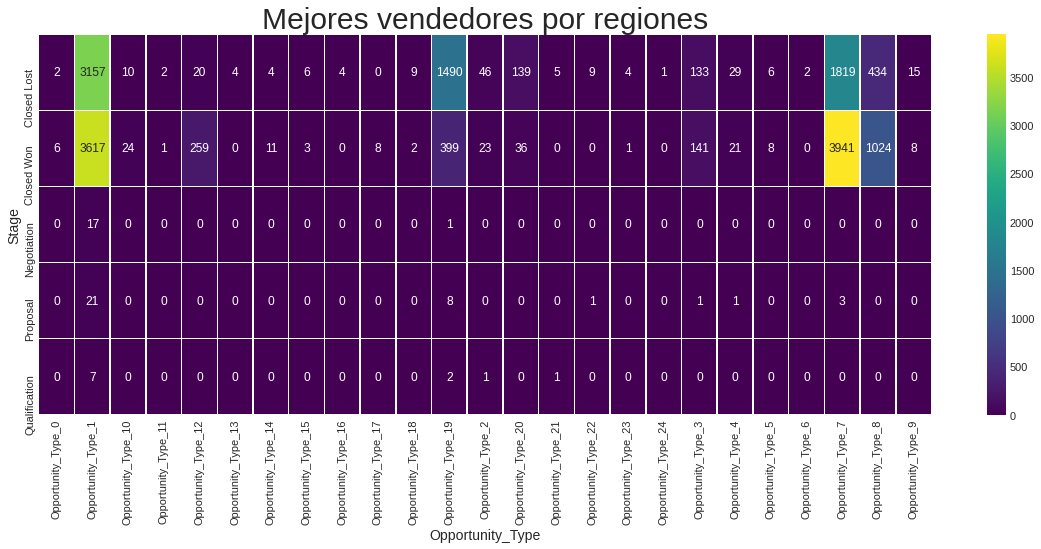

In [49]:
tabla = dataset[['Stage','Opportunity_Type','count']].groupby(['Stage','Opportunity_Type']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Stage", "Opportunity_Type", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Mejores vendedores por regiones',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [50]:
dataset['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13693
0     3254
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [51]:
top_products

,Product_Name,Stage,count
0,Product_Name_100,Closed Lost,401
1,Product_Name_100,Closed Won,575
2,Product_Name_111,Closed Lost,109
3,Product_Name_111,Closed Won,279
4,Product_Name_132,Closed Lost,121
5,Product_Name_132,Closed Won,262
6,Product_Name_148,Closed Lost,96
7,Product_Name_148,Closed Won,244
8,Product_Name_167,Closed Lost,63
9,Product_Name_167,Closed Won,270


In [52]:
lista_top_product = dataset['Product_Name'].value_counts().head(20).index.tolist()
top_products = dataset[dataset['Product_Name'].isin(lista_top_product)]
top_products

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
1,27760,EMEA,Other,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,48230.00,Closed Won,Prod_Category_A_None,0.884100,1,EMEA Other,2016_Q1,174 days,44 days,2.0
9,24355,Japan,Other,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,470400.00,Closed Lost,Prod_Category_A_None,111.195313,1,Japan Other,2016_Q1,233 days,82 days,0.0
10,24356,Japan,Other,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,470400.00,Closed Lost,Prod_Category_A_None,111.195313,1,Japan Other,2016_Q1,233 days,82 days,0.0
12,24358,Japan,Other,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,470400.00,Closed Lost,Prod_Category_A_None,111.229947,1,Japan Other,2016_Q1,233 days,82 days,0.0
14,24422,Japan,Other,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,559320.00,Closed Lost,Prod_Category_A_None,111.195313,1,Japan Other,2016_Q1,233 days,82 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,15853,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,112510.00,Closed Won,Prod_Category_A_None,0.884101,1,EMEA Germany,2016_Q1,860 days,84 days,25.0
16935,17677,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,528918.75,Closed Won,Prod_Category_A_None,0.884097,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


Text(0.5, 1.0, 'Cantidad de oportunidades creadas por Quarters y Products')

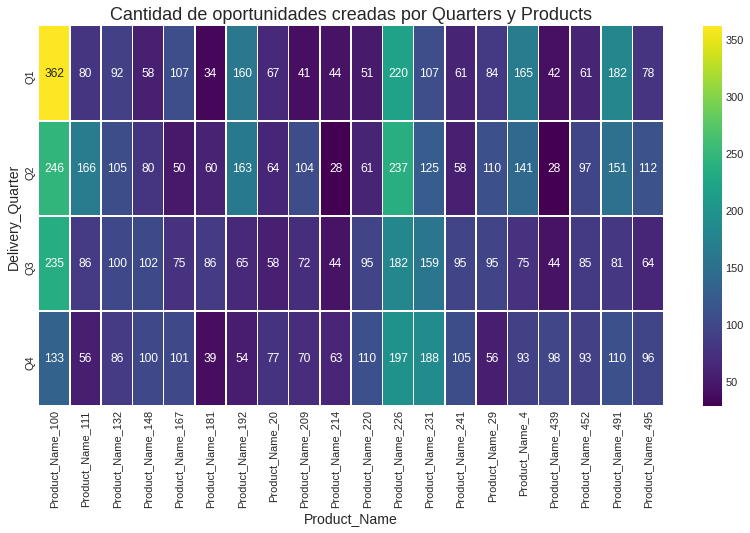

In [53]:
top_quarters_product = top_products.groupby(['Delivery_Quarter', 'Product_Name']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters_product.pivot("Delivery_Quarter", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades creadas por Quarters y Products"
mplt.title(title,fontsize=18)
#product_Dataset.nlargest(10, 'count')

In [54]:
lista_top_product = dataset_wins['Product_Name'].value_counts().head(20).index.tolist()
top_products = dataset_wins[dataset_wins['Product_Name'].isin(lista_top_product)]
top_products

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
1,27760,EMEA,Other,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,48230.00,Closed Won,Prod_Category_A_None,0.884100,1,EMEA Other,2016_Q1,174 days,44 days,2.0
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,103350.00,Closed Won,Prod_Category_A_None,0.884100,1,EMEA Germany,2016_Q1,865 days,51 days,11.0
65,24444,Japan,Other,1,1,0,0,0,Bureaucratic_Code_4,2015-04-20,...,243360.00,Closed Won,Prod_Category_A_None,111.229947,1,Japan Other,2016_Q1,234 days,29 days,0.0
66,18491,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,2014-01-08,...,214500.00,Closed Won,Prod_Category_A_None,0.884102,1,EMEA United Kingdom,2016_Q1,701 days,33 days,4.0
67,18494,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,2014-01-08,...,214500.00,Closed Won,Prod_Category_A_None,0.884102,1,EMEA United Kingdom,2016_Q1,701 days,40 days,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,15853,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,112510.00,Closed Won,Prod_Category_A_None,0.884101,1,EMEA Germany,2016_Q1,860 days,84 days,25.0
16935,17677,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,528918.75,Closed Won,Prod_Category_A_None,0.884097,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,299715.00,Closed Won,Prod_Category_A_None,0.884098,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


Text(0.5, 1.0, 'Cantidad de oportunidades ganadas por Quarters y Products')

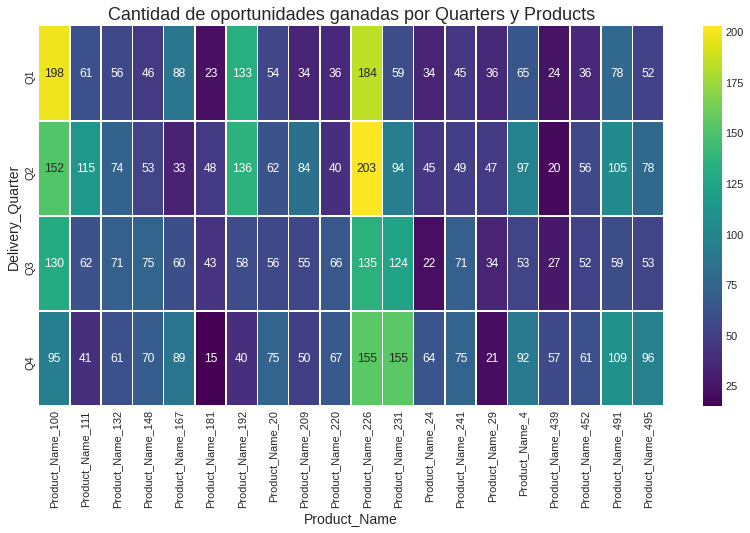

In [55]:
top_quarters_product = top_products.groupby(['Delivery_Quarter', 'Product_Name']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters_product.pivot("Delivery_Quarter", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades ganadas por Quarters y Products"
mplt.title(title,fontsize=18)


In [56]:
dataset['Delivery_Terms'].value_counts()

Delivery_Terms_4    7712
Delivery_Terms_2    4633
Delivery_Terms_1    2936
Delivery_Terms_6     781
Delivery_Terms_5     636
Delivery_Terms_8     164
Delivery_Terms_3      41
Delivery_Terms_7      38
Delivery_Terms_0       6
Name: Delivery_Terms, dtype: int64

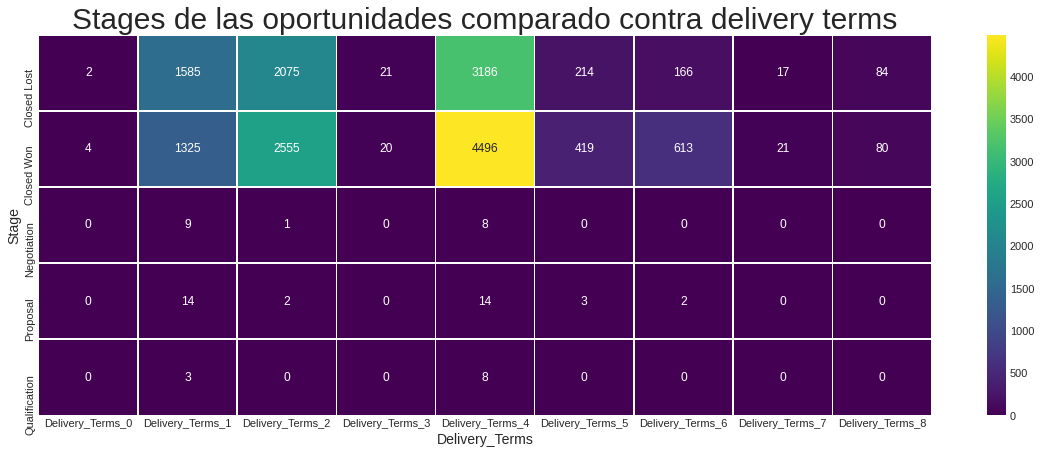

In [57]:
tabla = dataset[['Stage','Delivery_Terms','count']].groupby(['Stage','Delivery_Terms']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Stage", "Delivery_Terms", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Stages de las oportunidades comparado contra delivery terms',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

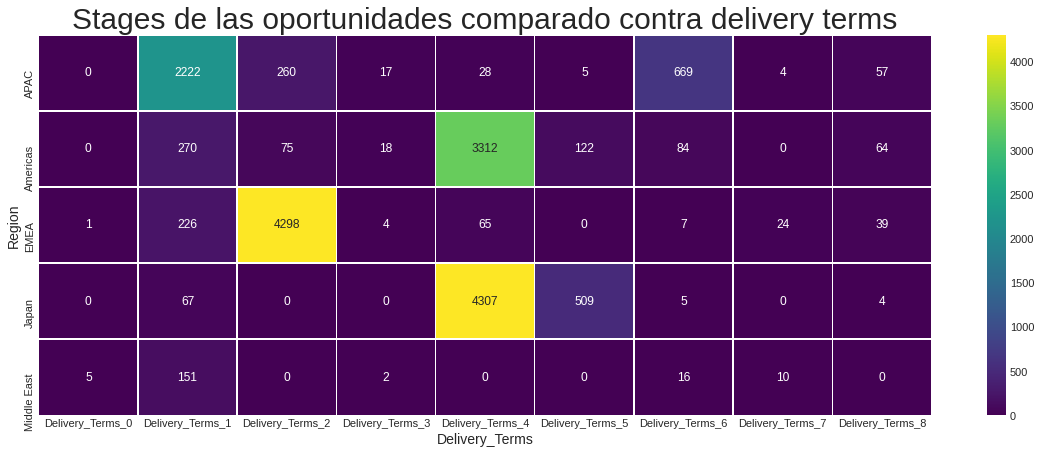

In [58]:
tabla = dataset[['Region','Delivery_Terms','count']].groupby(['Region','Delivery_Terms']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Delivery_Terms", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Stages de las oportunidades comparado contra delivery terms',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [59]:
dataset['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

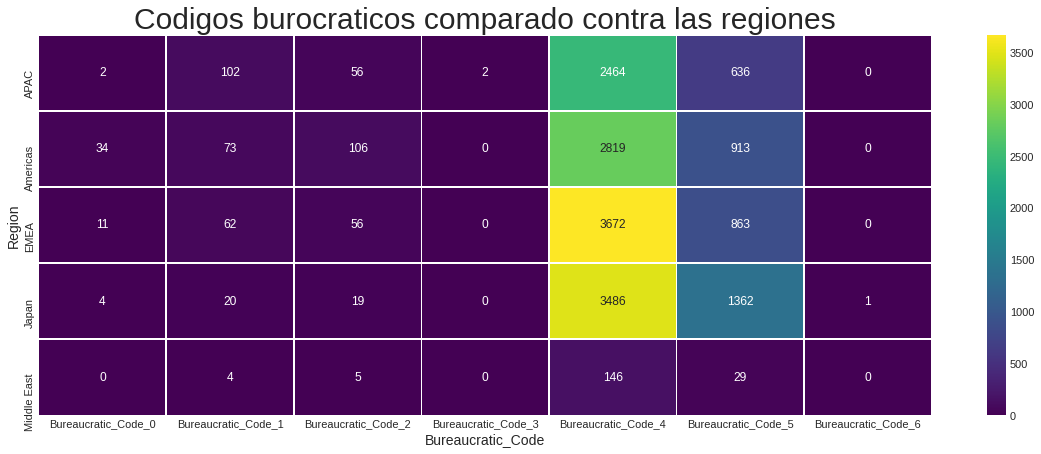

In [60]:
tabla = dataset[['Region','Bureaucratic_Code','count']].groupby(['Region','Bureaucratic_Code']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Bureaucratic_Code", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Codigos burocraticos comparado contra las regiones',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [61]:
dataset['Sales_Contract_No'].value_counts()

None    6973
479       36
108       36
2575      18
3876      16
        ... 
4933       1
426        1
3293       1
4319       1
1214       1
Name: Sales_Contract_No, Length: 5267, dtype: int64

In [62]:
dataset['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [63]:
dataset[dataset['Sales_Contract_No']== '3201']['ASP_(converted)'].value_counts()

0.17    4
0.18    2
0.25    1
Name: ASP_(converted), dtype: int64